## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_csv("E_Commerce_data.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Clean Dataset

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# missing data percentage
df.isna().sum()/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [8]:
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Filter out cancelled transaction. In the dataset description ,there are some cancelled transactions that is presented by invoice number starting with letter 'C'.

In [9]:
df = df[~df.InvoiceNo.str.contains('C')]
df.shape

(397924, 8)

#### Remove negative values in the 'quantity' and 'UnitPrice' columns to simplify the analysis

In [10]:
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [11]:
df = df[df['UnitPrice'] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### EDA

Convert 'InvoiceDate' to date time and those values become the row index.

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Create a new column 'Total_Sales' 

In [13]:
df['Total_Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Sales and Quantity Based on Country
Group the data by country and count the number of transactions and sum the total sales for each country

In [14]:
Sales_Country = df.groupby(['Country']).agg({'InvoiceNo': ['nunique'],
                                      'InvoiceNo': 'count', 'Total_Sales':'sum', 'Quantity':'sum'}).rename(columns={'InvoiceNo':'Total_Transaction'}).sort_values('Total_Sales', ascending=False)
Sales_Country.head(10)

,Total_Transaction,Total_Sales,Quantity
Country,,,
United Kingdom,354321,7308391.554,4256740
Netherlands,2359,285446.340,200361
EIRE,7236,265545.900,140275
Germany,9040,228867.140,119261
France,8341,209024.050,111471
Australia,1182,138521.310,83901
Spain,2484,61577.110,27940
Switzerland,1841,56443.950,30082
Belgium,2031,41196.340,23237


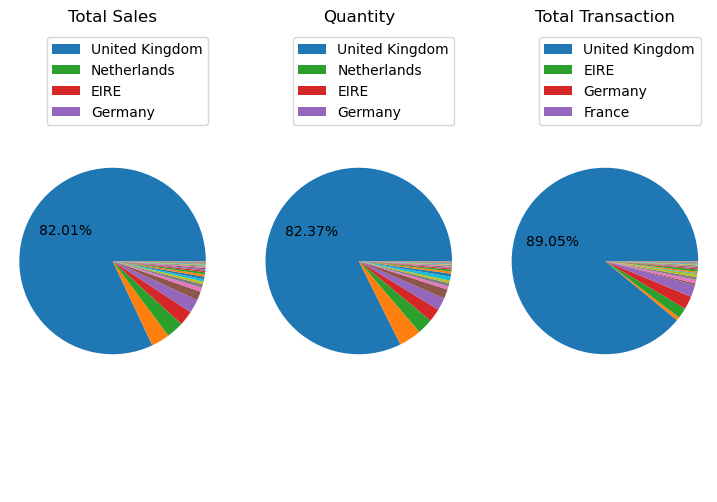

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,6))

def autopct(pct):
    return ('%1.2f%%' % pct) if pct > 80 else ''

p,t,a = ax1.pie(Sales_Country.Total_Sales, autopct=autopct)
p,t,a = ax2.pie(Sales_Country.Quantity, autopct=autopct)
p,t,a = ax3.pie(Sales_Country.Total_Transaction, autopct=autopct)
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')

# normalize dataframe (not actually needed here, but for general case)
normsizes1 = Sales_Country.Total_Sales/Sales_Country.Total_Sales.sum()*100
normsizes2 = Sales_Country.Quantity/Sales_Country.Quantity.sum()*100
normsizes3 = Sales_Country.Total_Transaction/Sales_Country.Total_Transaction.sum()*100

# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,Sales_Country.index.values,normsizes1.values) if i > 1])
h,j = zip(*[(h,lab) for h,lab,i in zip(p,Sales_Country.index.values,normsizes2.values) if i > 1])
h,k = zip(*[(h,lab) for h,lab,i in zip(p,Sales_Country.index.values,normsizes3.values) if i > 1])

ax1.set_title('Total Sales')
ax2.set_title('Quantity')
ax3.set_title('Total Transaction')
ax1.legend(h, l,loc="best", bbox_to_anchor=(1,1))
ax2.legend(h, j,loc="best", bbox_to_anchor=(1,1))
ax3.legend(h, k,loc="best", bbox_to_anchor=(1,1))
plt.show()

We can see that the majority of sales and transactions were made in UK and just 8.49% went abroad. The dataset is skewed to the UK

#### Best selling item

In [16]:
df['Description'].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
Name: Description, dtype: int64

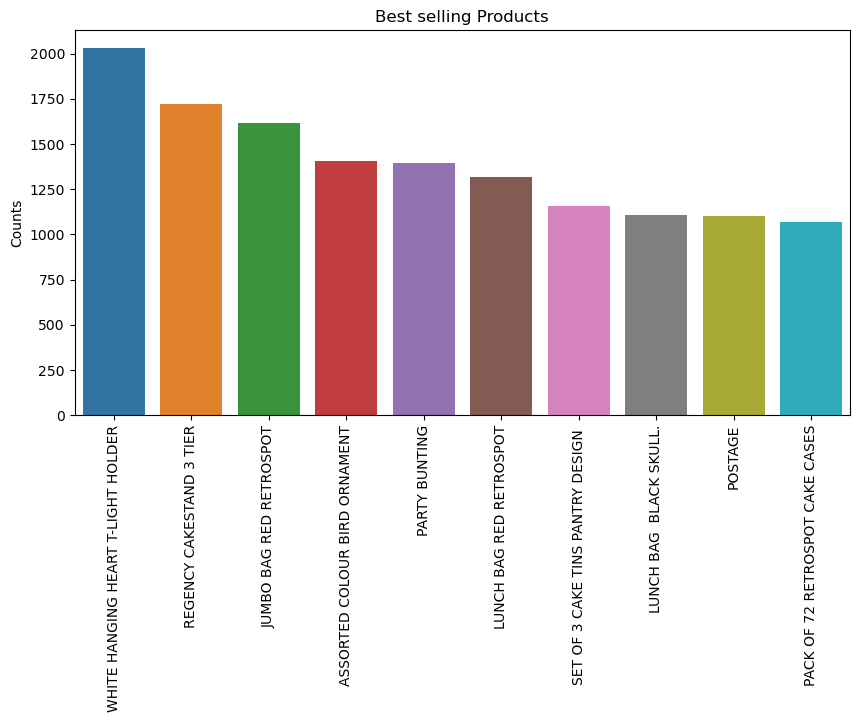

In [17]:
num_item = df['Description'].value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(10,5))
sns.barplot(x=num_item.index, y=num_item.values)
plt.ylabel("Counts")
plt.title("Best selling Products");
plt.xticks(rotation=90);

### Detecting outliers
Plot the data and remove data points that visually are definitely out of range

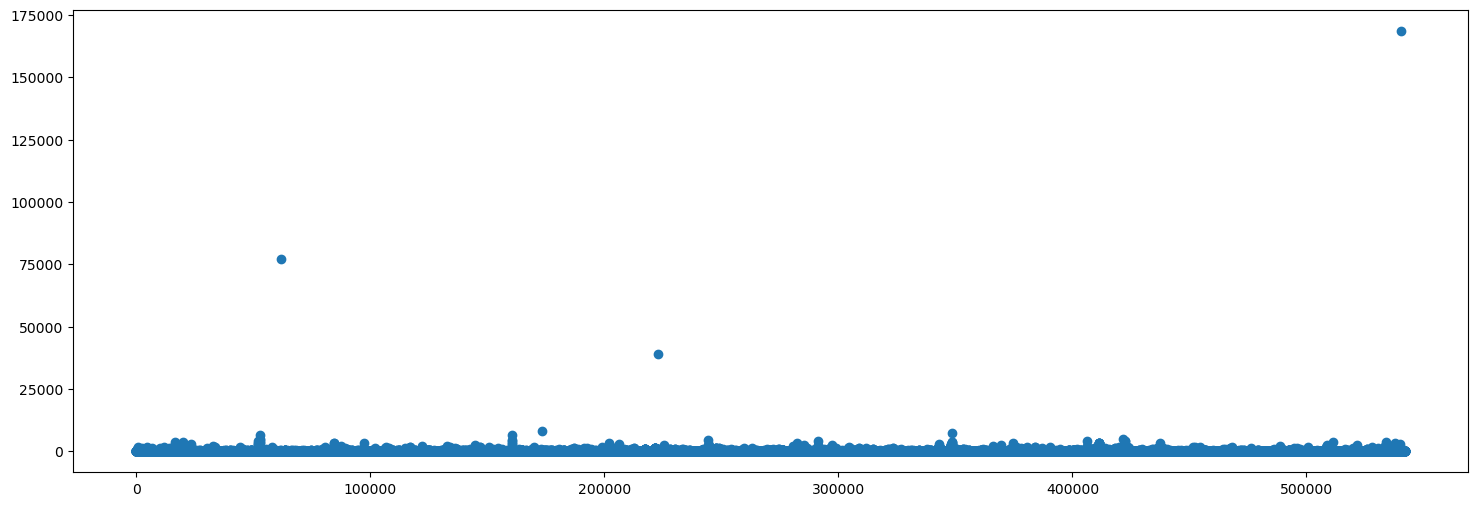

In [18]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Total_Sales'])
plt.show()

Remove outliers

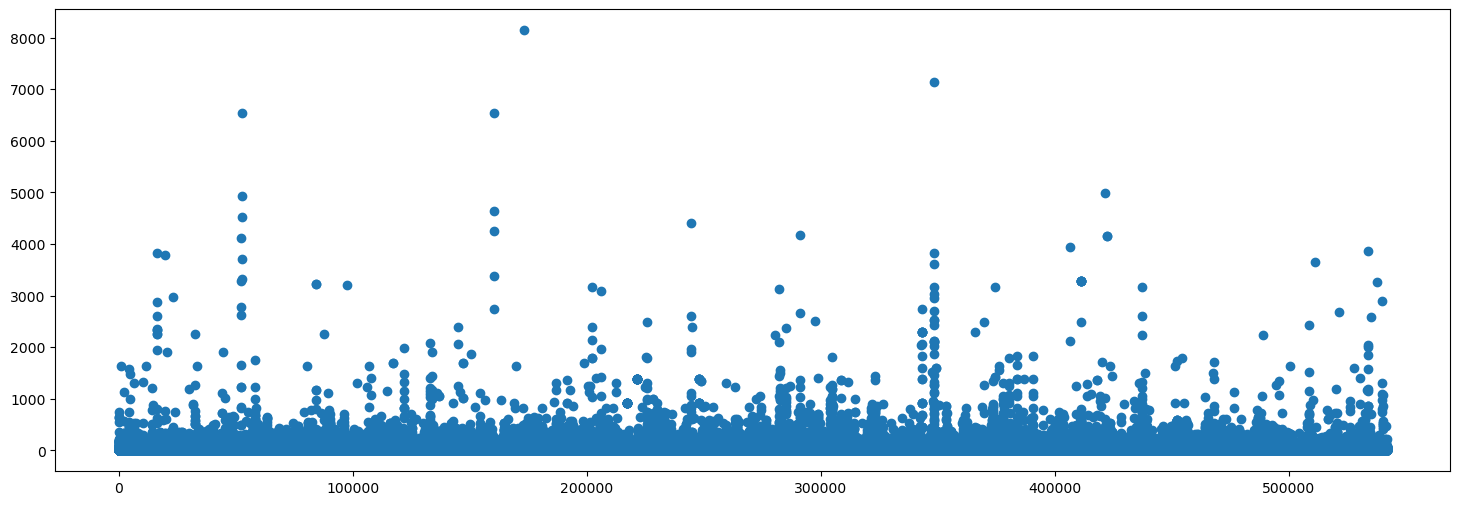

In [19]:
df = df[df['Total_Sales'] < 25000]
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Total_Sales'])
plt.show()

Check the distribution of our data by different percentiles of the numeric features

## Modelling
We can see from the visualisation,t the majority of sales from the and transactions were made in UK, so I split data into UK and non-UK and I analise UK data that the the model built for UK performs good on data for other countries

In [20]:
df_UK=df[df['Country']=="United Kingdom"]
df_Othters = df[df['Country'] != 'United Kingdom']

In [21]:
df_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def purcharse_frequency(x):
    return (x.max() - x.min()).days / x.count()

## Summarise the data by Country_Code
df_UK.groupby(['CustomerID']).agg({'Total_Sales': [min, max, sum, groupby_mean, groupby_count], 
                                           'InvoiceDate': [min, max, purchase_duration, purcharse_frequency]})

Total_Sales                                               \
                   min     max       sum groupby_mean groupby_count   
CustomerID                                                            
12747.0          10.20  243.00   4196.01    40.737961           103   
12748.0           0.06  850.50  33719.73     7.338353          4595   
12749.0           6.64  114.75   4090.88    20.557186           199   
12820.0           6.96   37.80    942.34    15.971864            59   
12821.0          10.20   19.92     92.72    15.453333             6   
...                ...     ...       ...          ...           ...   
18280.0          14.85   23.70    180.60    18.060000            10   
18281.0           5.04   16.95     80.82    11.545714             7   
18282.0           5.04   25.50    178.05    14.837500            12   
18283.0           0.29   20.80   2094.88     2.771005           756   
18287.0           5.04   87.00   1837.28    26.246857            70   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12747.0    2010-12-05 15:38:00 2011-12-07 14:34:00               366   
12748.0    2010-12-01 12:48:00 2011-12-09 12:20:00               372   
12749.0    2011-05-10 15:25:00 2011-12-06 09:56:00               209   
12820.0    2011-01-17 12:34:00 2011-12-06 15:12:00               323   
12821.0    2011-05-09 15:51:00 2011-05-09 15:51:00                 0   
...                        ...                 ...               ...   
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282.0    2011-08-05 13:35:00 2011-12-02 11:43:00               118   
18283.0    2011-01-06 14:14:00 2011-12-06 12:02:00               333   
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                                
           purcharse_frequency  
CustomerID                      
12747.0               3.553398  
12748.0               0.080958  
12749.0               1.050251  
12820.0               5.474576  
12821.0               0.000000  
...                        ...  
18280.0               0.000000  
18281.0               0.000000  
18282.0               9.833333  
18283.0               0.440476  
18287.0               2.257143  

[3919 rows x 9 columns]

In [23]:
customer_orders = df_UK.groupby(['CustomerID', 'InvoiceDate']).agg({'Total_Sales': [sum, groupby_mean, groupby_count]})
customer_orders = df_UK.groupby(['CustomerID', pd.Grouper(key = 'InvoiceDate', freq = '3M')]).agg({'Total_Sales':[sum, groupby_mean, groupby_count]})
customer_orders.head()

Total_Sales                           
                               sum groupby_mean groupby_count
CustomerID InvoiceDate                                       
12747.0    2010-12-31       706.27    47.084667            15
           2011-03-31       613.82    36.107059            17
           2011-06-30      1147.61    37.019677            31
           2011-09-30       301.70    43.100000             7
           2011-12-31      1426.61    43.230606            33

In [24]:
customer_orders = customer_orders.reset_index()
customer_orders.head()

CustomerID InvoiceDate Total_Sales                           
                                 sum groupby_mean groupby_count
0    12747.0  2010-12-31      706.27    47.084667            15
1    12747.0  2011-03-31      613.82    36.107059            17
2    12747.0  2011-06-30     1147.61    37.019677            31
3    12747.0  2011-09-30      301.70    43.100000             7
4    12747.0  2011-12-31     1426.61    43.230606            33

In [25]:
customer_orders.columns = ['CustomerID', 'InvoiceDate', 'sales_sum', 'sales_avg', 'sales_count']
print(customer_orders.head())

   CustomerID InvoiceDate  sales_sum  sales_avg  sales_count
0     12747.0  2010-12-31     706.27  47.084667           15
1     12747.0  2011-03-31     613.82  36.107059           17
2     12747.0  2011-06-30    1147.61  37.019677           31
3     12747.0  2011-09-30     301.70  43.100000            7
4     12747.0  2011-12-31    1426.61  43.230606           33


Divide transcation on a quarterly basis

In [26]:
customer_orders['Quarter'] = np.where(customer_orders['InvoiceDate'] == '2011-12-31', 'Q1',                                                     
                                      np.where(customer_orders['InvoiceDate'] == '2011-09-30', 'Q2', 
                                               np.where(customer_orders['InvoiceDate'] == '2011-06-30', 'Q3',
                                                        np.where(customer_orders['InvoiceDate'] == '2011-03-31', 'Q4', 'Q5'))))

customer_orders.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,Quarter
0,12747.0,2010-12-31,706.27,47.084667,15,Q5
1,12747.0,2011-03-31,613.82,36.107059,17,Q4
2,12747.0,2011-06-30,1147.61,37.019677,31,Q3
3,12747.0,2011-09-30,301.70,43.100000,7,Q2
4,12747.0,2011-12-31,1426.61,43.230606,33,Q1


Aggregate by quarter

In [27]:
Customer_orders_wide = pd.pivot_table(customer_orders, values = ['sales_sum', 'sales_avg', 'sales_count'], columns = 'Quarter', index = 'CustomerID')
Customer_orders_wide.head()

sales_avg                                             sales_count  \
Quarter            Q1         Q2         Q3         Q4         Q5          Q1   
CustomerID                                                                      
12747.0     43.230606  43.100000  37.019677  36.107059  47.084667        33.0   
12748.0      6.341639  10.570402   8.451155   6.310413   6.329536      2208.0   
12749.0     18.811972  22.307412  19.979070        NaN        NaN        71.0   
12820.0     16.297353  15.555000        NaN  15.496364        NaN        34.0   
12821.0           NaN        NaN  15.453333        NaN        NaN         NaN   

                                       sales_sum                             \
Quarter        Q2     Q3     Q4     Q5        Q1       Q2       Q3       Q4   
CustomerID                                                                    
12747.0       7.0   31.0   17.0   15.0   1426.61   301.70  1147.61   613.82   
12748.0     772.0  632.0  315.0  668.0  14002.34  8160.35  5341.13  1987.78   
12749.0      85.0   43.0    NaN    NaN   1335.65  1896.13   859.10      NaN   
12820.0      14.0    NaN   11.0    NaN    554.11   217.77      NaN   170.46   
12821.0       NaN    6.0    NaN    NaN       NaN      NaN    92.72      NaN   

                     
Quarter          Q5  
CustomerID           
12747.0      706.27  
12748.0     4228.13  
12749.0         NaN  
12820.0         NaN  
12821.0         NaN

In [28]:
Customer_orders_wide.columns = ['Q1_sales_avg', 'Q2_sales_avg', 'Q3_sales_avg', 'Q4_sales_avg', 'Q5_sales_avg', 
                                'Q1_sales_count', 'Q2_sales_count', 'Q3_sales_count', 'Q4_sales_count', 'Q5_sales_count',
                                'Q1_sales_sum', 'Q2_sales_sum', 'Q3_sales_sum', 'Q4_sales_sum', 'Q5_sales_sum']
print(Customer_orders_wide.head())

            Q1_sales_avg  Q2_sales_avg  Q3_sales_avg  Q4_sales_avg  \
CustomerID                                                           
12747.0        43.230606     43.100000     37.019677     36.107059   
12748.0         6.341639     10.570402      8.451155      6.310413   
12749.0        18.811972     22.307412     19.979070           NaN   
12820.0        16.297353     15.555000           NaN     15.496364   
12821.0              NaN           NaN     15.453333           NaN   

            Q5_sales_avg  Q1_sales_count  Q2_sales_count  Q3_sales_count  \
CustomerID                                                                 
12747.0        47.084667            33.0             7.0            31.0   
12748.0         6.329536          2208.0           772.0           632.0   
12749.0              NaN            71.0            85.0            43.0   
12820.0              NaN            34.0            14.0             NaN   
12821.0              NaN             NaN             

Fill missing values with 0

In [29]:
Customer_orders_wide = Customer_orders_wide.fillna(0)
print(Customer_orders_wide.head())

            Q1_sales_avg  Q2_sales_avg  Q3_sales_avg  Q4_sales_avg  \
CustomerID                                                           
12747.0        43.230606     43.100000     37.019677     36.107059   
12748.0         6.341639     10.570402      8.451155      6.310413   
12749.0        18.811972     22.307412     19.979070      0.000000   
12820.0        16.297353     15.555000      0.000000     15.496364   
12821.0         0.000000      0.000000     15.453333      0.000000   

            Q5_sales_avg  Q1_sales_count  Q2_sales_count  Q3_sales_count  \
CustomerID                                                                 
12747.0        47.084667            33.0             7.0            31.0   
12748.0         6.329536          2208.0           772.0           632.0   
12749.0         0.000000            71.0            85.0            43.0   
12820.0         0.000000            34.0            14.0             0.0   
12821.0         0.000000             0.0             

Import the needed libraries

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

Define the input and target variables

In [31]:
X = Customer_orders_wide[['Q2_sales_sum', 'Q3_sales_sum', 'Q4_sales_sum', 'Q5_sales_sum']]
y = Customer_orders_wide['Q1_sales_sum']

Standardise the input variables

In [32]:
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

Split data into train (80%) and test (20%)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = None)

# Random Forest 

In [37]:
RF_md = RandomForestRegressor(n_estimators = 500).fit(X_train, y_train)

RF_preds = RF_md.predict(X_test)

print('The random forest model RMSE(Root mean square error):', mean_squared_error(y_test, RF_preds, squared = False))
print('The random forest model MAE(Mean Absolute Error):', mean_absolute_error(y_test, RF_preds))


The random forest model RMSE(Root mean square error): 2354.5771289162976
The random forest model MAE(Mean Absolute Error): 502.9935445524519


# svm

In [38]:
SVM_md = SVR(kernel = 'linear').fit(X_train, y_train)

SVM_preds = SVM_md.predict(X_test)

print('The svm model RMSE(Root mean square error):', mean_squared_error(y_test, SVM_preds, squared = False))
print('The svm model MAE(Mean Absolute Error):', mean_absolute_error(y_test, SVM_preds))

The svm model RMSE(Root mean square error): 3454.4256594411036
The svm model MAE(Mean Absolute Error): 628.0340262696977


## Conclusion

Based on the number of orders by customer ID with UK data, I predicted future sales using sales number, sales volume and sales average on a quarterly basis.<br>
Root Mean Squared Error (RMSE)and Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. We can predict the test data by using the trained model. We can check the accuracy of predicted data by using MSE and RMSE metrics.<br>
RandomForest provided better results than SVM that recorded lower RMS error and and the average difference between the forecast and the observed values was 437

## Reference

pandas documentation(2023). pandas.to_datetime. Available at:https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html (Accessed: 6 Apr 2023).

Malli(2023).Pandas groupby() and count() with Examples. Available at:https://sparkbyexamples.com/pandas/pandas-groupby-count-examples (Accessed: 6 Apr 2023).

Ayşenur Özen(2021). E-Commerce Data: Exploratory Data Analysis(EDA). Available at: https://medium.com/analytics-vidhya/e-commerce-data-exploratory-data-analysis-eda-99b17cf53765 (Accessed: 6 Apr 2023).

DataTechNotes(2022).Regression Example with Linear SVR Method in Python. Available at: https://www.datatechnotes.com/2020/07/regression-example-with-linear-svr.html (Accessed: 7 Apr 2023).